In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 데이터 불러오기

buy = pd.read_csv('./data/buy.csv')
buy.columns = ['age','paycheck','purchase'] # age, paycheck : 연속, purchase :  범주 
buy.head()

,age,paycheck,purchase
0,26,160,구매
1,35,210,비구매
2,26,220,비구매
3,29,260,구매
4,22,110,비구매


In [3]:
print(buy.shape)
buy.info()

(20, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       20 non-null     int64 
 1   paycheck  20 non-null     int64 
 2   purchase  20 non-null     object
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [4]:
buy.purchase

0       구매
1      비구매
2     비구매 
3       구매
4      비구매
5      비구매
6       구매
7      비구매
8      비구매
9       구매
10      구매
11     비구매
12     비구매
13      구매
14      구매
15     비구매
16     비구매
17     비구매
18      구매
19     비구매
Name: purchase, dtype: object

In [7]:
buy_int = np.array([0]*len(buy))
buy_int[buy.purchase=='구매']=1
buy_int[buy.purchase=='비구매']=0
buy_int

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [8]:
buy.purchase = buy_int
buy.head()

,age,paycheck,purchase
0,26,160,1
1,35,210,0
2,26,220,0
3,29,260,1
4,22,110,0


In [9]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       20 non-null     int64
 1   paycheck  20 non-null     int64
 2   purchase  20 non-null     int32
dtypes: int32(1), int64(2)
memory usage: 528.0 bytes


In [12]:
# 원본데이터 보관
copy_buy = buy.copy()
copy_buy.head()

,age,paycheck,purchase
0,26,160,1
1,35,210,0
2,26,220,0
3,29,260,1
4,22,110,0


In [13]:
buy.purchase

0     1
1     0
2     0
3     1
4     0
5     0
6     1
7     0
8     0
9     1
10    1
11    0
12    0
13    1
14    1
15    0
16    0
17    0
18    1
19    0
Name: purchase, dtype: int32

In [14]:
test_buy = buy.copy()
test_buy

,age,paycheck,purchase
0,26,160,1
1,35,210,0
2,26,220,0
3,29,260,1
4,22,110,0
5,32,210,0
6,37,310,1
7,21,110,0
8,28,210,0
9,31,260,1


In [15]:
# 정규화 (표준화 Standard&Scaler)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(buy) # why? 모두 연속형 데이터이며 모두 다른 단위이므로

scaler.transform(buy)

array([[-0.67743894, -0.81302375,  1.22474487],
       [ 1.0161584 , -0.25994637, -0.81649658],
       [-0.67743894, -0.14933089, -0.81649658],
       [-0.11290649,  0.29313101,  1.22474487],
       [-1.43014887, -1.36610113, -0.81649658],
       [ 0.45162596, -0.25994637, -0.81649658],
       [ 1.39251337,  0.84620839,  1.22474487],
       [-1.61832635, -1.36610113, -0.81649658],
       [-0.30108397, -0.25994637, -0.81649658],
       [ 0.26344848,  0.29313101,  1.22474487],
       [ 1.20433589,  1.7311322 ,  1.22474487],
       [-1.24197138, -1.36610113, -0.81649658],
       [ 0.45162596,  1.17805482, -0.81649658],
       [-0.11290649, -0.70240827,  1.22474487],
       [ 1.39251337,  1.17805482,  1.22474487],
       [ 0.26344848,  0.07190006, -0.81649658],
       [-0.48926145, -0.03871542, -0.81649658],
       [-1.24197138, -0.25994637, -0.81649658],
       [ 1.95704582,  2.28420958,  1.22474487],
       [-0.48926145, -1.0342547 , -0.81649658]])

In [16]:
buy = scaler.transform(buy)

In [17]:
# 표준화된 buy
buy = pd.DataFrame(buy, columns=['age','paycheck','purchase'])
buy.head()

,age,paycheck,purchase
0,-0.677439,-0.813024,1.224745
1,1.016158,-0.259946,-0.816497
2,-0.677439,-0.149331,-0.816497
3,-0.112906,0.293131,1.224745
4,-1.430149,-1.366101,-0.816497


In [18]:
# 원본 buy
test_buy

,age,paycheck,purchase
0,26,160,1
1,35,210,0
2,26,220,0
3,29,260,1
4,22,110,0
5,32,210,0
6,37,310,1
7,21,110,0
8,28,210,0
9,31,260,1


In [19]:
buy.iloc[:, [1,2]]

,paycheck,purchase
0,-0.813024,1.224745
1,-0.259946,-0.816497
2,-0.149331,-0.816497
3,0.293131,1.224745
4,-1.366101,-0.816497
5,-0.259946,-0.816497
6,0.846208,1.224745
7,-1.366101,-0.816497
8,-0.259946,-0.816497
9,0.293131,1.224745


In [20]:
buy.iloc[:, [0]]

,age
0,-0.677439
1,1.016158
2,-0.677439
3,-0.112906
4,-1.430149
5,0.451626
6,1.392513
7,-1.618326
8,-0.301084
9,0.263448


In [24]:
x = buy.iloc[:, [0,1]].values

In [25]:
y = buy.iloc[:, [0]].values

In [26]:
x, y

(array([[-0.67743894, -0.81302375],
        [ 1.0161584 , -0.25994637],
        [-0.67743894, -0.14933089],
        [-0.11290649,  0.29313101],
        [-1.43014887, -1.36610113],
        [ 0.45162596, -0.25994637],
        [ 1.39251337,  0.84620839],
        [-1.61832635, -1.36610113],
        [-0.30108397, -0.25994637],
        [ 0.26344848,  0.29313101],
        [ 1.20433589,  1.7311322 ],
        [-1.24197138, -1.36610113],
        [ 0.45162596,  1.17805482],
        [-0.11290649, -0.70240827],
        [ 1.39251337,  1.17805482],
        [ 0.26344848,  0.07190006],
        [-0.48926145, -0.03871542],
        [-1.24197138, -0.25994637],
        [ 1.95704582,  2.28420958],
        [-0.48926145, -1.0342547 ]]),
 array([[-0.67743894],
        [ 1.0161584 ],
        [-0.67743894],
        [-0.11290649],
        [-1.43014887],
        [ 0.45162596],
        [ 1.39251337],
        [-1.61832635],
        [-0.30108397],
        [ 0.26344848],
        [ 1.20433589],
        [-1.24197138],
  

In [27]:
x_test = test_buy.iloc[:,[1,2]].values
y_test = test_buy.iloc[:, 0].values
x_test, y_test

(array([[160,   1],
        [210,   0],
        [220,   0],
        [260,   1],
        [110,   0],
        [210,   0],
        [310,   1],
        [110,   0],
        [210,   0],
        [260,   1],
        [390,   1],
        [110,   0],
        [340,   0],
        [170,   1],
        [340,   1],
        [240,   0],
        [230,   0],
        [210,   0],
        [440,   1],
        [140,   0]], dtype=int64),
 array([26, 35, 26, 29, 22, 32, 37, 21, 28, 31, 36, 23, 32, 29, 37, 31, 27,
        23, 40, 27], dtype=int64))

In [28]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor() # 수치예측
model.fit(x_test, y_test)

KNeighborsRegressor()

In [31]:
# 결정계수 표시

r2 = model.score(x_test, y_test)
print(r2)

0.6857648725212465


In [35]:
pred = model.predict(x_test)
print(pred)

[27.8 28.8 29.6 28.8 23.8 28.8 33.2 23.8 28.8 28.8 36.4 23.8 34.2 29.8
 34.2 28.8 29.4 28.8 36.4 23.8]


In [34]:
y_test

array([26, 35, 26, 29, 22, 32, 37, 21, 28, 31, 36, 23, 32, 29, 37, 31, 27,
       23, 40, 27], dtype=int64)

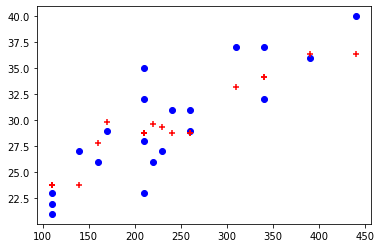

In [36]:
plt.scatter(test_buy.paycheck, y_test, marker='o' , c='b') # 실제값 월급이 나이에 미치는지
plt.scatter(test_buy.paycheck, pred, marker='+' , c='r')   # 예측값 월급이 나이에 영향을 미치는지
plt.show()